<a href="https://colab.research.google.com/github/Arjundeshpande/unalive/blob/main/Box_sprinkling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[206 191 195 205 221 194 202 218 196 216]


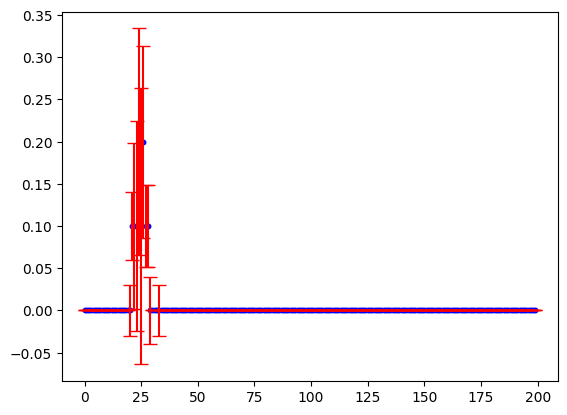

Time:  78.08404002799989


In [ ]:
#Box plus subinterval sprinkling
#Longest Path length Distribution.
#NOT NEEDED

import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
import scipy.stats as stats
from scipy.stats import chisquare
from array import array
start = timeit.default_timer()
# Parameters
sd_rep=10
ExpVal=200 #Expected value of Poisson Distribution
NoS=10 #Number of Sprinklings per Poisson Distribution
rng = np.random.default_rng()
n = rng.poisson(ExpVal, NoS) # number of points

print(n)
a = 100 # upper bound
b = 0 # lower bound
mem_num=0
memory = []
sd_memory = [[0 for x in range(ExpVal)] for y in range(sd_rep)]



def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

def box_sprinkling(target_a, target_b, target_c, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  fcoordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  fcoordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x

  coord1x=np.zeros(n[f])   # generate empty x
  coord1y=np.zeros(n[f])   # generate empty y
  coord2x=np.zeros(n[f])   # generate empty x
  coord2y=np.zeros(n[f])   # generate empty y
  coord3x=np.zeros(n[f])   # generate empty x
  coord3y=np.zeros(n[f])   # generate empty y
  coord4x=np.zeros(n[f])   # generate empty x
  coord4y=np.zeros(n[f])   # generate empty y
  coordx=np.zeros(n[f])   # generate empty x
  coordy=np.zeros(n[f])   # generate empty y

  count=0

  for i in range(n[f]):
    if (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
      coord1y[count]=fcoordy[i]   # copy valid x
      coord1x[count]=fcoordx[i]   # copy valid y
      count=count+1
    elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
      coord2y[count]=fcoordy[i]   # copy valid x
      coord2x[count]=fcoordx[i]   # copy valid y
      count=count + 1
    elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
      coord3y[count]=fcoordy[i]   # copy valid x
      coord3x[count]=fcoordx[i]   # copy valid y
      count =count + 1
    elif (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
      coord4y[count]=fcoordy[i]   # copy valid x
      coord4x[count]=fcoordx[i]   # copy valid y
      count =count + 1

  coordx=coord1x+coord2x+coord3x+coord4x
  coordy=coord1y+coord2y+coord3y+coord4y
  index = np.argsort(coordx) # declare index array

  return coordx, coordy, index, n[f]   # returns x and y coordinates of all valid points & index array & new count


# Initialize relation Matrix
for k in range(sd_rep):
  rep=k

  memory=[0 for x in range(ExpVal)]  # reset memory of number of longest paths counted per Poisson distribution
  for f in range(NoS):
    sno=f  # sno = sprinkling number
    new_n=0
    save_n=n[f]  # used for saving, in memory, the initial value of n[f] generated by the Poisson distribution
    coordx, coordy, index, n[f]= box_sprinkling(0, 100, 50, 1)   # call Edge Bias Compensation function, save data
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]

    # Calculate Relation Matrix
    for i in range(n[f]):
        for j in range (n[f]):
            R[i][j]=0
            if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
                R[i][j]=1

  # Calculate Link Matrix
    for i in range(n[f]):
        for j in range (n[f]):
            L[i][j]=0
            if(R[i][j]==0):
                L[i][j]==0
            elif(i>j):
                L[i][j]=1
                for point in range (min(i,j)+1, max(i,j)):
                    if(R[i][point]==1 and R[point][j]==1):
                        L[i][j]=0

    #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
        for j in range(n[f]):
            if(_LP_int[i][j] > proper_time):
              proper_time=_LP_int[i][j]
    memory[proper_time] +=1

    n[f]=save_n  # reset n[f] to original value for next repetition
  for i in range(ExpVal):
    sd_memory[rep][i]= (memory[i]/NoS)   # save in memory the distribution of longest paths for a given repetition




stnd_dev=np.std(sd_memory, axis=0)   # calculate Standard Deviation
variance=np.var(sd_memory, axis=0)   # calculate Variance
show_rep = 0  # choose which repetition to be graphed range(sd_rep)
for i in range(ExpVal):
  #if(sd_memory[show_rep][i] !=0):  #zero-filter; toggle on/off for different data display
  plt.scatter(i, sd_memory[show_rep][i], linewidths=2, c='b', s=5)
  plt.errorbar(i, sd_memory[show_rep][i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)  # substitute yerr=stnd_dev[i] with yerr=variance[i]
  list1 = []   # i don't know exactly how it works, but it does
  for q in range(15):
    list1.append(q)

  list2=list(sd_memory[show_rep])
  list3=stnd_dev.tolist()
  list4=variance.tolist()
  rows = list(zip(list1, list2, list3, list4))

  wtr = csv.writer(open ('EBC_longestpathlengthDistribution.csv', 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[       nan 2.96452608 3.1483474  2.93859723 2.93347822 3.19037481
 2.90492967 2.89761297 2.81874696 3.08018285 3.03286764 2.9657574
 3.03014427 2.77769439 2.89981413 2.85220203 2.98226562 2.99514664
 3.10665367 2.83573042 3.06496743 3.23108764 3.05997193 2.84835395
 3.09668324 3.06810371 2.94350822 2.89756619 2.82115276 2.89567221
 3.00696799 2.98640106 3.02411734 2.93632609 3.04910154 3.20351572
 2.93400288 3.00718301 3.15199844 3.04408442 2.8702875  2.91216833
 3.05048788 2.91790537 2.92277627 3.07298749 3.23790087 2.88858591
 3.0084506  2.80485534 3.14895429]
Time:  42.57884554100002


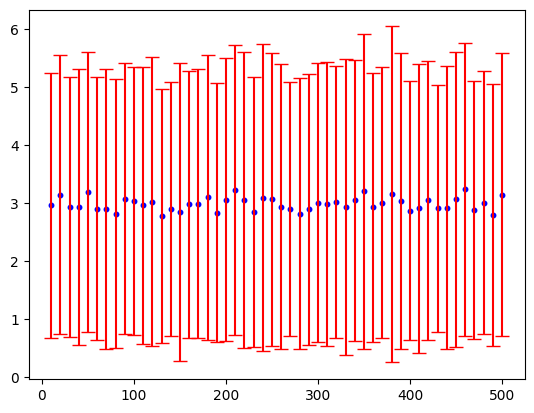

In [ ]:
#Box plus subinterval sprinkling
#chisquare test.

import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
import scipy.stats as stats
from scipy.stats import chisquare
from array import array
start = timeit.default_timer()
# Parameters
#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=10
NoS=500
a = 100 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
finalchi=np.zeros(cycles)
stnd_dev=np.zeros(cycles)
variance=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))

a = 100 # upper bound
b = 0 # lower bound

def chival(target_a, target_b, target_c, graph_points): # function which returns a set of sprinkled points with edge-points eliminated
  chistat = []
  for z in range(NoS):
    newval = n[z]
    fcoordy = (b-a)* np.random.random_sample((newval,))+a # generate random y
    fcoordx = (b-a)* np.random.random_sample((newval,))+a # generate random x

    coord1x=np.zeros(newval)   # generate empty x
    coord1y=np.zeros(newval)   # generate empty y
    coord2x=np.zeros(newval)   # generate empty x
    coord2y=np.zeros(newval)   # generate empty y
    coord3x=np.zeros(newval)   # generate empty x
    coord3y=np.zeros(newval)   # generate empty y
    coord4x=np.zeros(newval)   # generate empty x
    coord4y=np.zeros(newval)   # generate empty y
    coordx=np.zeros(newval)   # generate empty x
    coordy=np.zeros(newval)   # generate empty y

    count=0

    for i in range(newval):
      if (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
        coord1y[count]=fcoordy[i]   # copy valid x
        coord1x[count]=fcoordx[i]   # copy valid y
        count=count+1
      elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
        coord2y[count]=fcoordy[i]   # copy valid x
        coord2x[count]=fcoordx[i]   # copy valid y
        count=count + 1
      elif (fcoordy[i] >=target_c and fcoordy[i]<=target_b and fcoordx[i] >=target_a and fcoordx[i]<=target_c):
        coord3y[count]=fcoordy[i]   # copy valid x
        coord3x[count]=fcoordx[i]   # copy valid y
        count =count + 1
      elif (fcoordy[i] >=target_a and fcoordy[i]<=target_c and fcoordx[i] >=target_c and fcoordx[i]<=target_b):
        coord4y[count]=fcoordy[i]   # copy valid x
        coord4x[count]=fcoordx[i]   # copy valid y
        count =count + 1

    coordx=coord1x+coord2x+coord3x+coord4x
    coordy=coord1y+coord2y+coord3y+coord4y
    index = np.argsort(coordx) # declare index array

    arra=0
    arrb=0
    arrc=0
    arrd=0
    for i in range(newval):
      if (coord1x[index[i]] !=0):
        arra += 1
      if (coord2x[index[i]] !=0):
        arrb += 1
      if (coord3x[index[i]] !=0):
        arrc += 1
      if (coord4x[index[i]] !=0):
        arrd += 1

    f_obs=arra,arrb,arrc,arrd
    f_obs=np.array(f_obs)

    stat=chisquare(f_obs)
    stat = np.array(stat)

    stat=np.array(stat)
    chistat=np.append(chistat,stat[0])
    if(graph_points):
      for i in range(newval):
        if (coord1x[index[i]] !=0):
          arr=np.array(coord1x[index[i]])
          plt.plot(coord1x[index[i]],coord1y[index[i]],'bo')
          plt.text(coord1x[index[i]],coord1y[index[i]], i+1)
        if (coord2x[index[i]] !=0):
          plt.plot(coord2x[index[i]],coord2y[index[i]],'mo')
          plt.text(coord2x[index[i]],coord2y[index[i]], i+1)
        if (coord3x[index[i]] !=0):
          plt.plot(coord3x[index[i]],coord3y[index[i]],'yo')
          plt.text(coord3x[index[i]],coord3y[index[i]], i+1)
        if (coord4x[index[i]] !=0):
          plt.plot(coord4x[index[i]],coord4y[index[i]],'go')
          plt.text(coord4x[index[i]],coord4y[index[i]], i+1)
      print(newval)
      print(f_obs)
      print(stat)
      plt.gca().set_aspect('equal', adjustable='box')
      plt.show()

  return coordx, coordy, index,chistat   # returns x and y coordinates of all valid points & index array & new count

for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  #print(n)
  #print(cy)
  coordx, coordy, index,chistat= chival(0, 100, 50, 0)   # call Edge Bias Compensation function, save data
  #print(chistat)
  chistat = np.array(chistat)
  finalchi[cy] = np.average(chistat)
  stnd_dev[cy]=np.std(chistat)
  variance[cy]=np.var(chistat)
print(finalchi)
for i in range(cycles):
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], finalchi[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], finalchi[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =[" "," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "N"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Chistat"]
  list2.extend(finalchi)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Chisquare calculation", "Variance"]
  list4.extend(variance)
  rows = list(zip(list0, list1, list2, list3, list4))

  wtr = csv.writer(open ('BOX_CHISTAT_FIT_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

stop = timeit.default_timer()
print('Time: ', stop - start)

[512 477 512 535 473 502 502 483 518 527 524 497 511 456 486 504 505 498
 445 510 492 514 461 503 497 492 526 474 518 529 463 462 470 478 513 494
 489 462 472 475 520 457 526 514 501 515 512 558 518 515 504 495 549 517
 511 530 502 485 510 527 477 487 501 455 530 528 506 538 511 476 497 534
 535 506 507 494 461 530 490 490 478 501 460 550 502 518 552 497 527 510
 467 474 499 520 470 492 487 489 501 522]
6323238.0


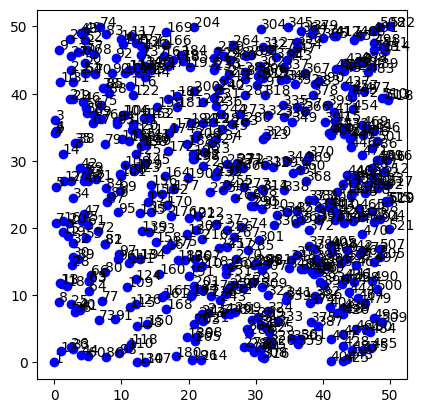

[2.40370371e+03 1.91049553e+03 1.66678735e+03 1.50607918e+03
 1.38678767e+03 1.29229616e+03 1.21430465e+03 1.14807504e+03
 1.09064901e+03 1.04005631e+03 9.94919165e+02 9.54236566e+02
 9.17258513e+02 8.83408664e+02 8.52234640e+02 8.23374901e+02
 7.96535996e+02 7.71476503e+02 7.47995441e+02 7.25923735e+02
 7.05117819e+02 6.85454761e+02 6.66828498e+02 6.49146900e+02
 6.32329432e+02 6.16305298e+02 6.01011933e+02 5.86393781e+02
 5.72401291e+02 5.58990082e+02 5.46120252e+02 5.33755798e+02
 5.21864127e+02 5.10415637e+02 4.99383368e+02 4.88742697e+02
 4.78471072e+02 4.68547796e+02 4.58953823e+02 4.49671591e+02
 4.40684872e+02 4.31978640e+02 4.23538959e+02 4.15352878e+02
 4.07408339e+02 3.99694104e+02 3.92199675e+02 3.84915237e+02
 3.77831597e+02 3.70940134e+02 3.64232752e+02 3.57701841e+02
 3.51340236e+02 3.45141186e+02 3.39098320e+02 3.33205623e+02
 3.27457406e+02 3.21848286e+02 3.16373166e+02 3.11027210e+02
 3.05805830e+02 3.00704668e+02 2.95719583e+02 2.90846633e+02
 2.86082066e+02 2.814223

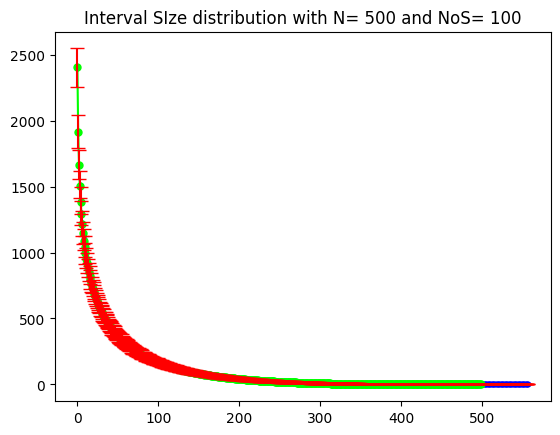

Time:  1868.933333064


In [ ]:
#FINAL
#Interval Size Distribution.
#Endpoint: EXCLUDED
#X-axis: Interval Size | Y-axis: avg Interval Size distribution over NoS number of sprinklings, with SD over average Interval Size distribution per sprinkling
# It uses Eq. 20 (specialized to 2D) from Glaser and Surya, Phys Rev D 2013
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from mpmath import mp
start = timeit.default_timer()

#Variables
ExpVal=500
N=ExpVal
NoS=100
a = 50 # upper bound
b = 0 # lower bound
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
n+=2
memory=np.zeros(shape=(NoS,np.max(n)))
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
sub_int = np.zeros(N-1)  # sub_int(i) = <n_i>
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP


for f in range(NoS):
  if(f==0):
    print(n)
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  coordy[0]=a
  coordx[0]=a
  coordy[1]=b
  coordx[1]=b
  index = np.argsort(coordx) # declare index array

#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1
      if (coordx[index[j]] > coordx[index[i]] and coordy[index[j]] > coordy[index[i]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  if(f==-1):
#Print LP
    print("  Longest Path :")
    for i in range(n[f]):
      for j in range (n[f]):
        print(" ", _LP[i][j], end= '' )
      print()

# Print relation Matrix
    print("  Relation Matrix :")
    for i in range(n[f]):
        for j in range (n[f]):
            print(" ", R[i][j], end= '' )
        print()

# Print link Matrix
    print("  Link Matrix :")
    for i in range(n[f]):
        for j in range (n[f]):
            print(" ", L[i][j], end= '' )
        print()

  for i in range(n[f]):
    for j in range(i+1, n[f]):
      # if(L[i][j]):
      #   memory[f][0]+=1
      if(R[i][j]):
        active_count=0
        counter[f] +=1
        for point in range(i+1,j):
          if (coordy[index[point]]>coordy[index[i]] and coordy[index[point]]<coordy[index[j]]):
            active_count +=1
        memory[f][active_count] +=1
sum_count=np.sum(counter)
print(sum_count)
average=np.sum(memory, axis=0)/NoS
#print(memory[27])
#print(average)
#print(sum(memory[27]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

for i in range(n[f]):
  plt.plot(coordx[index[i]],coordy[index[i]],'bo')
  plt.text(coordx[index[i]],coordy[index[i]], i+1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
# determines <n_i> for sub-intervals of EXCLUSIVE size i
for i in range (0,N-1):
  f1 = N**(i+2) / mp.factorial(i+2)
  f2 = 1 / (i+2)
  f3 = 1 / (i+1)
  sub_int[i] = f1*f2*f3*mp.hyp2f2(i+1,i+1,i+3,i+3,-N)  #sub_int(i) = <n_i>
print(sub_int)
plotted_x = []
plotted_y = []
for i in range(len(sub_int)):
  plotted_x.append(i)
  plotted_y.append(sub_int[i])
plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='5')
plt.title('Interval SIze distribution with N= %d and NoS= %d'%(N, NoS))

yexp = plotted_y
chistat=[]
for i in range(len(yexp)):
  chistat=np.append(chistat,(((average[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

for i in range(np.max(n)):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  #plt.yscale('log')
  list1 = ["Information:", "Interval Size"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"IS freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=["chistat=%.4f"%(chistat), "Analytical Estimation"]
  list5.extend(sub_int)
  rows = list(zip(list1, list2, list5, list3, list4))

  wtr = csv.writer(open ('BOX_ISD_NEW_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[3.60319067e+01 1.96048546e+01 1.26778026e+01 8.75075053e+00
 6.24036519e+00 4.52998003e+00 3.31959556e+00 2.44254662e+00
 1.79764676e+00 1.31942920e+00 9.63469567e-01 6.98493654e-01
 5.01843655e-01 3.56734730e-01 2.50523714e-01 1.73577208e-01
 1.18507416e-01 7.96395523e-02 5.26278939e-02 3.41689463e-02]


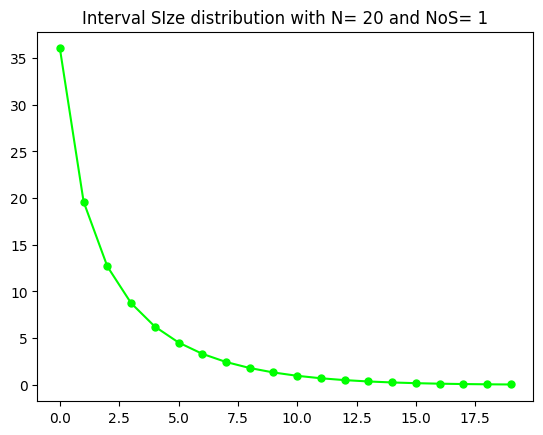

Time:  0.8465552939996996


In [ ]:
# This code snipet is to calculate the mean sub-interval sizes in a causet interval
# It uses Eq. 20 (specialized to 2D) from Glaser and Surya, Phys Rev D 2013
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from mpmath import mp
start = timeit.default_timer()
N = 20  #number of causal set elements
NoS=1
# array to hold the mean sub-interval sizes
sub_int = np.zeros(N)  # sub_int(i) = <n_i>

# determines <n_i> for sub-intervals of EXCLUSIVE size i
for i in range (0,N):
  f1 = N**(i+2) / mp.factorial(i+2)
  f2 = 1 / (i+2)
  f3 = 1 / (i+1)
  sub_int[i] = f1*f2*f3*mp.hyp2f2(i+1,i+1,i+3,i+3,-N)  #sub_int(i) = <n_i>
print(sub_int)
plotted_x = []
plotted_y = []
for i in range(len(sub_int)):
  plotted_x.append(i)
  plotted_y.append(sub_int[i])
plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='5')
plt.title('Interval SIze distribution with N= %d and NoS= %d'%(N, NoS))
plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start)

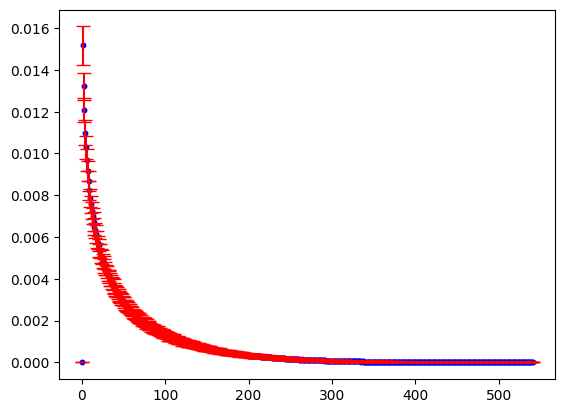

Time:  1007.595915846


In [ ]:
#Interval Size Distribution.
#Endpoint: INCLUDED
#X-axis: Interval Size | Y-axis: avg Interval Size distribution over NoS number of sprinklings, with SD over avearge Interval Size distribution per sprinkling
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
ExpVal=500
NoS=50
a = 50 # upper bound
b = 0 # lower bound
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
memory=np.zeros(shape=(NoS,np.max(n)))
counter=np.zeros(NoS)
average=np.zeros(ExpVal)

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP


for f in range(NoS):
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  coordy[0]=a
  coordx[0]=a
  coordy[1]=b
  coordx[1]=b
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  for i in range(n[f]):
    for j in range(n[f]):
      if(_LP_int[i][j] != 0):
        active_count=0
        counter[f] +=1
        for point in range(index[j]+1, index[i]):
          if (coordy[index[point]]>coordy[index[j]] and coordy[index[point]]<coordy[index[i]]):
            active_count +=1
        if(active_count >0):
          memory[f][active_count] +=1

sum_count=np.sum(counter)
average=np.sum(memory, axis=0)/sum_count
for f in range(NoS):
  memory[f]=memory[f]/counter[f]

#print(memory[0])
#print(average)
#print(sum(memory[0]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

for i in range(np.max(n)):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
 # plt.yscale('log')
  list1 = ["Information:", "Interval Size"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"IS freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  rows = list(zip(list1, list2, list3, list4))

  wtr = csv.writer(open ('BOX_ISD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

cycles :
21
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]
DONE 0 / 21 @@@@@@@@@@@@@@@@@@@@
[22 19 29 26 33 27 25 22 26 20 25 35 35 23 25 27 19 31 28 20 27 27 26 18
 29 32 21 35 28 31 23 28 23 28 30 28 28 27 28 21 28 27 31 23 25 36 27 23
 30 27]
DONE 1 / 21 @@@@@@@@@@@@@@@@@@@@
[51 52 60 36 70 54 48 45 51 44 58 49 52 56 58 47 51 42 60 40 52 52 54 54
 40 44 44 57 38 51 65 49 52 52 51 32 49 54 60 55 35 59 43 49 51 38 53 58
 52 39]
DONE 2 / 21 @@@@@@@@@@@@@@@@@@@@
[ 60  72  79  85  85  90  78  80 102  70  65  79  77  69  85  78  75  72
  92  82  89  73  78  69  69  60  78  79  82  76  81  86  68  71  82  85
  81  90  78  93  74  68  79  67  88  82  75  77  90  65]
DONE 3 / 21 @@@@@@@@@@@@@@@@@@@@
[105  84 109  96  85  88  96 103 106 116  96 102 103 114  98 105 115  92
  99  99 107  97  95 109 102  97 127 107  99 109  97  91  91 116  85  80
 115  97  88 126  84 108 111  98  91 109 113  86 108 105]
DONE 4 / 21 @@@@@@@@@@@@@@@@@@@@
[131

<ipython-input-9-e86fc580a0e9>:121: RuntimeWarning: divide by zero encountered in power
  f=2- 0.79*x**(-0.25)
<ipython-input-9-e86fc580a0e9>:122: RuntimeWarning: invalid value encountered in multiply
  y=np.sqrt(x)*f
<ipython-input-9-e86fc580a0e9>:125: RuntimeWarning: divide by zero encountered in power
  fnew=2-0.79*running_ExpVal**(-0.25)
<ipython-input-9-e86fc580a0e9>:127: RuntimeWarning: invalid value encountered in multiply
  yexp=yexp*fnew
<ipython-input-9-e86fc580a0e9>:145: RuntimeWarning: divide by zero encountered in power
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
<ipython-input-9-e86fc580a0e9>:145: RuntimeWarning: invalid value encountered in double_scalars
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)


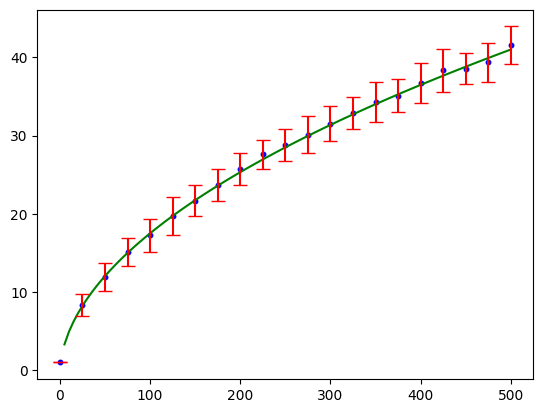

Time:  3536.8084448179998


In [ ]:
#Longest Path length Distribution
#Endpoints: EXCLUDED
#X-axis: ExpVal | Y-axis: avg ProperTime(Longest Path Length) over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.special import gamma, factorial
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=25
NoS=50
a = 50 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
print("cycles :")
print(cycles)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
average=np.zeros(cycles)
naverage=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))
x=np.zeros(cycles)


def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  if(running_ExpVal[cy]>0):
    n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  n+=2
  print(n)
  for f in range(NoS):
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]
    # Random coordinates [b,a) uniform distributed
    coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
    coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random
    if(np.max(n)>0):
      coordx[0]=a
      coordy[0]=a
      coordx[1]=b
      coordy[1]=b
    index = np.argsort(coordx) # declare index array
  #    print(index)

      # Calculate Relation Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        R[i][j]=0
        if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
          R[i][j]=1

    # Calculate Link Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        L[i][j]=0
        if(R[i][j]==0):
          L[i][j]==0
        elif(i>j):
          L[i][j]=1
          for point in range (min(i,j)+1, max(i,j)):
            if(R[i][point]==1 and R[point][j]==1):
              L[i][j]=0

      #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
      for j in range(n[f]):
        if(_LP_int[i][j] > proper_time):
          proper_time=_LP_int[i][j]
    memory[cy][f] = proper_time
  average[cy]=sum(memory[cy])/NoS
  naverage[cy]=sum(n)/len(n)
  print("DONE %d / %d @@@@@@@@@@@@@@@@@@@@"%(cy, cycles))
  #x[cy]=sum(n)/NoS
#np.sqrt(running_ExpVal[cy]/5000)
print(memory[2])
print(average[2])
print(naverage)
print(sum(memory[2]))

stnd_dev=np.std(memory, axis=1)
variance=np.var(memory, axis=1)

x=np.linspace(start_ExpVal, end_ExpVal, 100)
f=2- 0.79*x**(-0.25)
y=np.sqrt(x)*f
running_ExpVal=np.array(running_ExpVal)
# print(running_ExpVal)
fnew=2-0.79*running_ExpVal**(-0.25)
yexp=np.sqrt(running_ExpVal)
yexp=yexp*fnew
yexp=np.delete(yexp,0)
averagenew=np.delete(average,0)
print(averagenew,yexp)
# chistat=stats.chisquare(averagenew,yexp)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

#np.sqrt(x/5000)
#y=np.sqrt(np.pi)/(2*gamma(1/2))*x**2
plt.plot(x,y, 'g')

analytical_val=np.zeros(cycles)
for i in range(cycles):
  x=running_ExpVal[i]
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
for i in range(cycles):
  x=running_ExpVal[i]
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], average[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "Expected Value"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Longest Path Length"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Excluded", "Variance"]
  list4.extend(variance)
  list5=["Initial ExpVal= %d" %(start_ExpVal), "Analytical Estimation"]
  list5.extend(analytical_val)
  rows = list(zip(list0, list1, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_LPD_EP_excluded_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start)

cycles :
11
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
DONE 0 / 11 @@@@@@@@@@@@@@@@@@@@
[56 67 42 32 42 39 68 37 52 50 39 41 46 58 48 54 50 44 46 39 57 46 41 50
 48 46 42 45 55 51 57 47 51 43 50 41 57 47 54 46 58 43 50 50 40 44 61 42
 47 54 43 48 48 44 51 48 43 45 50 48 56 40 53 63 64 52 53 46 50 45 47 55
 48 47 38 47 42 47 50 41 53 49 44 43 50 52 49 58 43 53 41 56 53 53 58 51
 56 61 58 50]
DONE 1 / 11 @@@@@@@@@@@@@@@@@@@@
[ 80  89 114 104 108  85  97  89 101 107  88 118 108  96 135  93 115  89
 109  92 108 105 101 107  90  94 108 105 117 105  88 102  85  81 115 100
  98  91  88 110  91 101 106 108 118 107  77  92 103 119 111  98 108 106
  88 108 101 103 104 101 104 101 113 107  99 101  98  94  98 103  96  90
  97 105  95  89 112 119  80 102  98 104 101  95 109  81 107 103 102  99
 111 106 101  87 107 100 113 102  92 102]
DONE 

<ipython-input-2-48cdea72dc76>:120: RuntimeWarning: divide by zero encountered in power
  f=2- 0.79*x**(-0.25)
<ipython-input-2-48cdea72dc76>:121: RuntimeWarning: invalid value encountered in multiply
  y=np.sqrt(x)*f
<ipython-input-2-48cdea72dc76>:124: RuntimeWarning: divide by zero encountered in power
  fnew=2-0.79*running_ExpVal**(-0.25)
<ipython-input-2-48cdea72dc76>:126: RuntimeWarning: invalid value encountered in multiply
  yexp=yexp*fnew
<ipython-input-2-48cdea72dc76>:144: RuntimeWarning: divide by zero encountered in power
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
<ipython-input-2-48cdea72dc76>:144: RuntimeWarning: invalid value encountered in double_scalars
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)


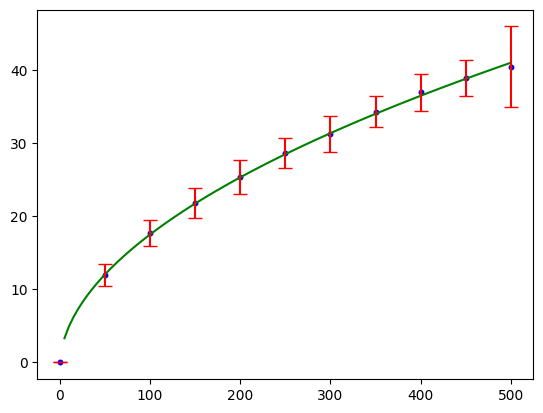

In [ ]:
#Longest Path length Distribution
#Endpoints: INCLUDED
#X-axis: ExpVal | Y-axis: avg ProperTime(Longest Path Length) over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.special import gamma, factorial
start = timeit.default_timer()

#Variables
start_ExpVal=0
end_ExpVal=500
EV_step=50
NoS=100
a = 50 # upper bound
b = 0 # lower bound
cycles=np.floor((end_ExpVal-start_ExpVal)/EV_step+1).astype(int)
print("cycles :")
print(cycles)
running_ExpVal=np.zeros(cycles)
for i in range(cycles):
  running_ExpVal[i]=start_ExpVal+i*EV_step
running_ExpVal=running_ExpVal.astype(int)
memory=np.zeros(shape=(cycles,NoS))
average=np.zeros(cycles)
naverage=np.zeros(cycles)
n_2d=np.zeros(shape=(cycles, NoS))
x=np.zeros(cycles)


def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

for cy in range(cycles):
  avg=0
  rng = np.random.default_rng()
  if(running_ExpVal[cy]>0):
    n_2d[cy] = rng.poisson(running_ExpVal[cy], NoS)
  n=np.zeros(NoS)
  n=n_2d[cy].astype(int)
  print(n)
  for f in range(NoS):
    R = [[0 for x in range(n[f])] for y in range(n[f])]
    L = [[0 for x in range(n[f])] for y in range(n[f])]
    # Random coordinates [b,a) uniform distributed
    coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
    coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random
    if(np.max(n)>0):
      coordx[0]=a
      coordy[0]=a
      coordx[1]=b
      coordy[1]=b
    index = np.argsort(coordx) # declare index array
  #    print(index)

      # Calculate Relation Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        R[i][j]=0
        if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
          R[i][j]=1

    # Calculate Link Matrix
    for i in range(n[f]):
      for j in range (n[f]):
        L[i][j]=0
        if(R[i][j]==0):
          L[i][j]==0
        elif(i>j):
          L[i][j]=1
          for point in range (min(i,j)+1, max(i,j)):
            if(R[i][point]==1 and R[point][j]==1):
              L[i][j]=0

      #Calculate avg and proper time longest path length
    _LP=longest_path_matrix(R, dmax=None)
    _LP_int=_LP.astype(int)
    proper_time=0
    for i in range(n[f]):
      for j in range(n[f]):
        if(_LP_int[i][j] > proper_time):
          proper_time=_LP_int[i][j]
    memory[cy][f] = proper_time
  average[cy]=sum(memory[cy])/NoS
  naverage[cy]=sum(n)/len(n)
  print("DONE %d / %d @@@@@@@@@@@@@@@@@@@@"%(cy, cycles))
  #x[cy]=sum(n)/NoS
#np.sqrt(running_ExpVal[cy]/5000)
print(memory[2])
print(average[2])
print(naverage)
print(sum(memory[2]))

stnd_dev=np.std(memory, axis=1)
variance=np.var(memory, axis=1)

x=np.linspace(start_ExpVal, end_ExpVal, 100)
f=2- 0.79*x**(-0.25)
y=np.sqrt(x)*f
running_ExpVal=np.array(running_ExpVal)
# print(running_ExpVal)
fnew=2-0.79*running_ExpVal**(-0.25)
yexp=np.sqrt(running_ExpVal)
yexp=yexp*fnew
yexp=np.delete(yexp,0)
averagenew=np.delete(average,0)
print(averagenew,yexp)
# chistat=stats.chisquare(averagenew,yexp)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

#np.sqrt(x/5000)
#y=np.sqrt(np.pi)/(2*gamma(1/2))*x**2
plt.plot(x,y, 'g')

analytical_val=np.zeros(cycles)
for i in range(cycles):
  x=running_ExpVal[i]
  analytical_val[i]=(2- 0.79*x**(-0.25))*np.sqrt(x)
for i in range(cycles):
  x=running_ExpVal[i]
  #if(sd_memory[3][i] !=0):
  plt.scatter(running_ExpVal[i], average[i], linewidths=2, c='b', s=5)
  plt.errorbar(running_ExpVal[i], average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list1 = ["Information:", "Expected Value"]
  list1.extend(running_ExpVal)
  list2=["Final ExpVal= %d" %(end_ExpVal),"Longest Path Length"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  list5=["Initial ExpVal= %d" %(start_ExpVal), "Analytical Estimation"]
  list5.extend(analytical_val)
  rows = list(zip(list0, list1, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_LPD_EP_included_%d_%d.csv'%(end_ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
stop = timeit.default_timer()
print('Time: ', stop - start)

In [ ]:
#NEW TEST
#K-Path Distribution WITH ANALYTICAL EXPRESSION
#Endpoint: EXCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from mpmath import *
start = timeit.default_timer()


#Variables
N=100
d = 2  #number of dimensions
NoS=10
a = 50 # upper bound
b = 0 # lower bound
howfar2plot=25

ExpVal=N
counter=np.zeros(NoS)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
n+=2
print(n)
memory=np.zeros(shape=(NoS,max(n)))
average=np.zeros(max(n))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

for f in range(NoS):
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  if(np.max(n)>0):
    coordx[0]=a
    coordy[0]=a
    coordx[1]=b
    coordy[1]=b
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range(n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range(min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  # if f==1:
  #   print("  Relation Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", R[i][j], end= '' )
  #       print()
  #   print("  Link Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", L[i][j], end= '' )
  #       print()
  path_counts=count_paths(L)
 # print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]
# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)


###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(9,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1,2,3,4,5,6,7,8]
for k in range(9,25):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(25,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints excluded", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_KPD_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[ 84  91 126 124 120  90  99 104 105 108]


NameError: ignored

[58 55 39 43 47 43 45 45 57 51 57 34 55 48 59 50 55 57 45 52 69 38 44 48
 55 43 66 65 51 68 58 50 60 50 60 57 47 35 43 54 65 54 45 52 57 81 49 47
 47 51 38 54 55 67 59 49 58 65 62 61 58 51 63 47 61 49 49 61 53 58 53 49
 56 53 48 62 61 54 59 49 37 52 49 74 58 43 50 55 49 47 47 53 50 46 48 45
 55 51 58 54 43 61 58 54 59 52 46 66 48 57 51 52 36 53 56 46 47 50 58 46
 46 54 50 50 53 61 60 40 54 69 47 48 56 47 58 53 62 49 45 48 45 58 46 43
 54 66 45 48 50 43 51 57 70 49 42 48 58 40 54 50 46 59 50 55 49 59 46 55
 43 54 51 57 45 45 55 50 46 53 55 56 47 39 51 50 51 53 62 49 61 46 53 42
 52 40 56 47 60 46 51 46 45 54 57 57 48 56 57 54 48 52 47 60 61 69 52 45
 64 51 57 63 68 53 51 55 57 45 55 50 44 60 41 50 50 57 52 58 52 46 61 58
 54 40 42 58 53 61 52 52 47 44 64 58 42 48 44 52 56 67 71 56 57 54 50 50
 37 49 57 50 52 41 45 55 56 56 45 47 51 55 45 58 56 54 63 43 43 46 59 52
 43 50 62 50 56 48 60 60 55 46 60 51 38 43 58 48 53 47 52 47 52 51 61 47
 58 56 45 49 47 60 56 50 53 54 46 54 46 55 38 51 52

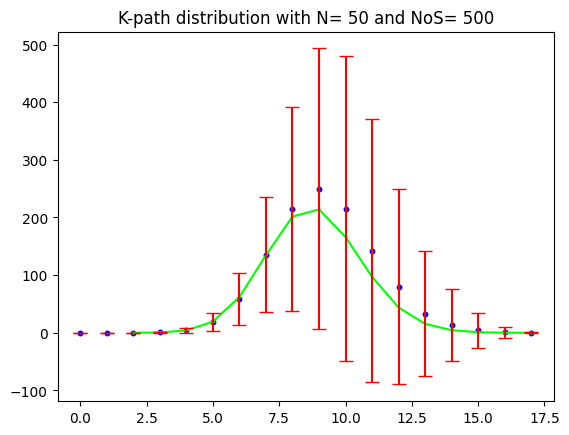

Time:  28.77070346399978


In [ ]:
#K-Path Distribution WITH ANALYTICAL EXPRESSION
#Endpoint: EXCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()


#Variables
N=50
d = 2  #number of dimensions
NoS=500
a = 50 # upper bound
b = 0 # lower bound
howfar2plot=18

ExpVal=N
counter=np.zeros(NoS)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
n+=2
print(n)
memory=np.zeros(shape=(NoS,max(n)))
average=np.zeros(max(n))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

for f in range(NoS):
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  if(np.max(n)>0):
    coordx[0]=a
    coordy[0]=a
    coordx[1]=b
    coordy[1]=b
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range(n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range(min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  # if f==1:
  #   print("  Relation Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", R[i][j], end= '' )
  #       print()
  #   print("  Link Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", L[i][j], end= '' )
  #       print()
  path_counts=count_paths(L)
 # print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]
# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)


###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1]
for k in range(2,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(howfar2plot,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints excluded", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_KPD_EP_excluded_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[ 82  66  60  87  70  78  61  67  75  79  80  59  79  79  72  63  66  71
  74  87  70  85  77  79  77  66  91  93  69  81  85  81  72  62  55  83
  85  79  85  68  79  77  81  65  64  81  79  71  64  63  93  73  75  88
  94  86  66  54  83  91  97  84  67  75  83  69  66  78  64  77  91  70
  77  61  75  92  91  82  70  59  67  57  79  81  67  83  76  64  84  75
  58  69  79  81  70  83  73  61  92  74  81  76  70  75  75  75  66  77
  69  71  64  81  73  65  72  55  72  71  91  78  76  77  86  75  75  66
  78  87  81  64  70  79  87  66  83  76  67  87  75  77  89  88  75  85
  76  85  88  68  73  67  75  81  76  80  84  73  81  67  79  68  69  61
  61  71  66  80  65  74  87  71  66  90  81  63  80  72  67  79  58  76
  66  58  73  89 101  76  91  87  77  78  81  73  63  65  70  81  76  86
  71  75  71  60  81  65  74  61  61  76  64  70  92  61  65  79  82  66
  64  77  68  79  66  72  78  90  71  74  89  78  80  81  76  69  99  70
  81  84  73  78  92  57  86  88  73  69  68  94  6

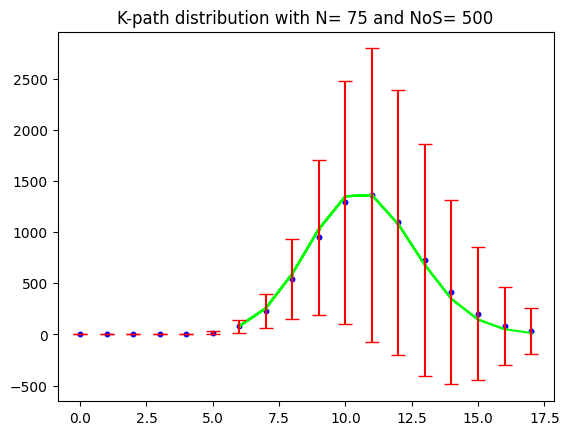

Time:  109.2133614190002


In [ ]:
#K-Path Distribution WITH ANALYTICAL EXPRESSION
#Endpoint: INCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()


#Variables
N=50
d = 2  #number of dimensions
NoS=500
a = 50 # upper bound
b = 0 # lower bound
howfar2plot=18

ExpVal=N
counter=np.zeros(NoS)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
print(n)
memory=np.zeros(shape=(NoS,max(n)))
average=np.zeros(max(n))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

for f in range(NoS):
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  if(np.max(n)>0):
      coordx[0]=a
      coordy[0]=a
      coordx[1]=b
      coordy[1]=b
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range(n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range(min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  # if f==1:
  #   print("  Relation Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", R[i][j], end= '' )
  #       print()
  #   print("  Link Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", L[i][j], end= '' )
  #       print()
  path_counts=count_paths(L)
 # print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]
# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(ExpVal):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)


###########################################
# ANALYTICAL Expression
###########################################

#print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=comb(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    # if k==1 :
    #   print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(6,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    plotted_x.append(k)
    plotted_y.append(kval[k])

# Plot the dots
  plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='lime', markersize='1')
plt.title('K-path distribution with N= %d and NoS= %d'%(N, NoS))
print(kval)
plt.plot()
yexp = []
indexfordel= [0,1,2,3,4,5]
for k in range(6,howfar2plot):
  if kval[k]>0 and kval[k]<10**4:
    yexp.append(kval[k])
  else:
    indexfordel.append(k)
print(yexp)

for i in range(howfar2plot,len(average)):
  indexfordel.append(i)
averagenew=np.delete(average,indexfordel)
print("averagenew")
print(averagenew)
chistat=[]
for i in range(len(averagenew)):
  chistat=np.append(chistat,(((averagenew[i]-yexp[i])**2)/yexp[i]))
chistat=np.sum(chistat)
print("chistat", chistat) #chisquare value comparing values to analytical expression

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =["chistat=%.4f"%(chistat)," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  list5=[" ", "Analytical Estimation"]
  list5.extend(kval)
  rows = list(zip(list0, list5, list2, list3, list4))

  wtr = csv.writer(open ('BOX_KPD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

[155 122 142 143 148 139 165 154 167 137 140 151 160 151 157 153 148 143
 134 136 143 151 154 148 153 141 146 150 173 157 158 158 132 144 141 164
 143 140 155 160 152 149 144 138 139 147 154 163 127 167]


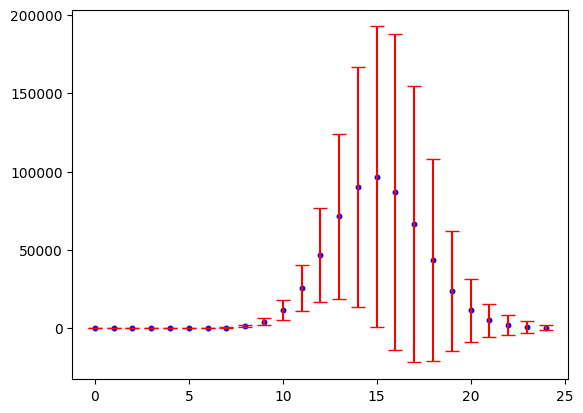

Time:  1336.4569437669998


In [ ]:
#K-Path Distribution WITHOUT ANALYTICAL EXPRESSION
#Endpoint: INCLUDED
#X-axis: K-Path length | Y-axis: avg # of K_Paths over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
start = timeit.default_timer()


#Variables
N=150
d = 2  #number of dimensions
NoS=50
a = 50 # upper bound
b = 0 # lower bound
howfar2plot=25

ExpVal=N
counter=np.zeros(NoS)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
print(n)
memory=np.zeros(shape=(NoS,max(n)))
average=np.zeros(max(n))

def count_paths(adj_matrix):
  N = len(adj_matrix)  # Number of nodes in the graph
  path_counts = [0] * (N + 1)  # Initialize an array to store path counts by length
  def dfs(node, length):
    if length > N:  # Ignore paths longer than the number of nodes
      return
    if length and node==N-1:
      path_counts[length] += 1  # Increment the count for the current length
    for neighbor in range(N):
      if adj_matrix[node][neighbor] == 1:
        dfs(neighbor, length + 1)  # Recursive DFS call with increased length
  # Start the DFS traversal from each node
  dfs(0, 0)
  return path_counts

def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP

for f in range(NoS):
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
  coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  if(np.max(n)>0):
      coordx[0]=a
      coordy[0]=a
      coordx[1]=b
      coordy[1]=b
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] < coordx[index[j]] and coordy[index[i]] < coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range(n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i<j):
        L[i][j]=1
        for point in range(min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0
  # if f==1:
  #   print("  Relation Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", R[i][j], end= '' )
  #       print()
  #   print("  Link Matrix :")
  #   for i in range(n[f]):
  #       for j in range (n[f]):
  #           print(" ", L[i][j], end= '' )
  #       print()
  path_counts=count_paths(L)
 # print(path_counts)
  for i in range(1, n[f]):
    memory[f][i]=path_counts[i]
# for f in range(NoS):
#   print(memory[f][10])
# print(memory[0])
# print(memory)
total_number=np.sum(memory, axis=0)
#print(total_number)
for i in range(max(n)):
  average[i]=total_number[i]/NoS
stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

###########################################
# DATA EXPORT
###########################################
for i in range(howfar2plot):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list0 =[" "," "]
  for q in range(np.max(n)):
    list0.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path Distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints Included", "Variance"]
  list4.extend(variance)
  rows = list(zip(list0, list2, list3, list4))

  wtr = csv.writer(open ('BOX_KPD_EP_included_NOANALYTICAL_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

In [ ]:
# This code snipet is to calculate the mean number of k-paths in a causet interval
# It uses Eqs. 12-14 from Aghili, Bombelli, and Pilgrim 2019
# Figure 1: A comparison of the average of many sprinklings of 50 and 100 points to their corresponding analytical distributions, on the left and right respectively. Due to numerical error, the theory curve starts at 9.

import math
import numpy as np
from numpy import float128
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from mpmath import *
start = timeit.default_timer()

d = 2  #number of dimensions
N = 120  #number of causal set elements
print(np.finfo(np.longdouble))
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik_num_part= np.zeros((N+1,N+3))
fik_exp_part= np.zeros((N+1,N+3))

def separate_float_into_number_and_power(number):
    # Get the exponent of the number using logarithm base 10
    exponent = int(math.floor(math.log10(abs(number))))

    # Calculate the number part
    number_part = number / (10 ** exponent)

    return number_part, exponent

def multiply_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 * number_part2

    # Add the exponents
    result_exponent = exponent1 + exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result

def divide_floats(num1, num2):
    # Separate the numbers into number_part and exponent
    number_part1, exponent1 = separate_float_into_number_and_power(num1)
    number_part2, exponent2 = separate_float_into_number_and_power(num2)

    # Multiply the number parts
    result_number_part = number_part1 / number_part2

    # Add the exponents
    result_exponent = exponent1 - exponent2

    # Combine them into the final result
    result = result_number_part * (10 ** result_exponent)

    return result
# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = gamma(i+1)


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + multiply_floats(gamma(1+(i-j)*d/2), fik[j][k-1])
     # old_settings = np.seterr(all='warn', over='raise')
    fik_exp_part[i][k]=1
    fik_num_part[i][k]=1


# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK =0
kval=np.zeros(N+2)
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    add=binomial(N-k+1,i) * ((-1)**(i)) * multiply_floats(divide_floats(gamma(i+1) , gamma((i+k)*d/2)),fik[i][k])
    add=divide_floats(add, gamma(1+(k-1+i)*d/2))
    NumK = NumK + add
    if k==1 :
      print(NumK)
  fact_div=1
  for i in range(N-k+2, N+1):
    fact_div=fact_div*i

  kval[k] = multiply_floats(NumK , fact_div)

plotted_x = []
plotted_y = []
for k in range(10, N+1):
# if kval[k]>0 and kval[k]<10**4:
  plotted_x.append(k)
  plotted_y.append(kval[k])

# Plot the dots
  plt.plot(plotted_x, plotted_y, marker='o', linestyle='-', color='green')

print(kval)

plt.show()
stop = timeit.default_timer()
print('Time: ', stop - start)

Machine parameters for float128
---------------------------------------------------------------
precision =  18   resolution = 1e-18
machep =    -63   eps =        1.084202172485504434e-19
negep =     -64   epsneg =     5.42101086242752217e-20
minexp = -16382   tiny =       3.3621031431120935063e-4932
maxexp =  16384   max =        1.189731495357231765e+4932
nexp =       15   min =        -max
smallest_normal = 3.3621031431120935063e-4932   smallest_subnormal = 4e-4951
---------------------------------------------------------------

1.0
-119.0
7021.0
-273819.0
7940751.0
-182637273.0
3470108187.0
-56017460733.0
784244450262.0
-9672348219898.0
106395830418878.0
-1.05428595596888e+15
9.48857360371994e+15
-7.80982596613872e+16
5.91315394579074e+17
-4.13920776205352e+18
2.69048504533479e+19
-1.63011740982049e+20
9.23733198898277e+20
-4.91037121519611e+21
2.45518560759805e+22
-1.15744464358194e+23
5.15588977595591e+23
-2.17444047072923e+24
8.69776188291693e+24
-3.30514951550843e+25
1.1949386

ValueError: ignored

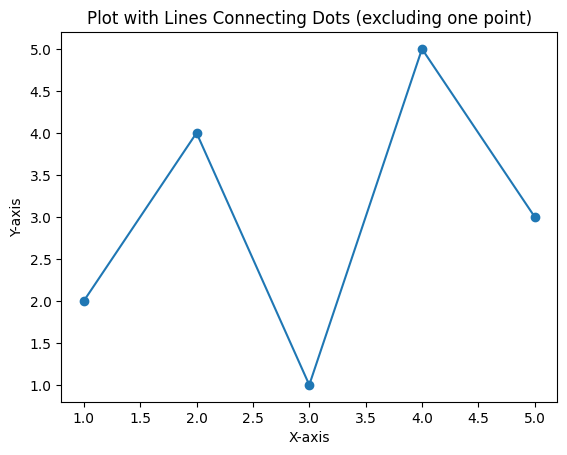

In [ ]:
import matplotlib.pyplot as plt

# Sample data: x and y coordinates of the dots
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Data point to exclude (index of the data point)
exclude_index = [2,3]

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize lists to store the coordinates of plotted points
plotted_x = []
plotted_y = []

# Loop through the data and plot only the points that are not excluded
for i in range(len(x)):
    if i != exclude_index:
        plotted_x.append(x[i])
        plotted_y.append(y[i])

# Plot the dots
ax.plot(plotted_x, plotted_y, marker='o', linestyle='-')

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot with Lines Connecting Dots (excluding one point)')

# Show the plot
plt.show()

15
[0.00000000e+00 3.40000000e+01 1.44118711e+02 1.91864415e+02
 1.20255129e+02 4.25922384e+01 9.46949551e+00 1.41339319e+00
 1.48113814e-01 1.12290160e-02 6.27881333e-04 2.61809094e-05
 8.17369744e-07 1.90581465e-08 3.28667975e-10 4.11374191e-12
 3.61647179e-14 2.10845948e-16]


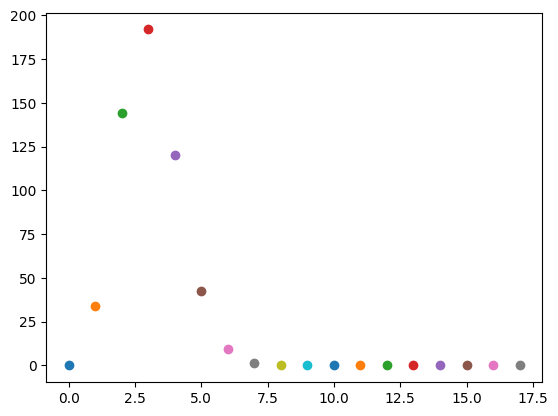

Time:  13.775916054999925


In [ ]:
#Analytical expression of KPD EP_EXCL
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial
start = timeit.default_timer()

#Variables
N=18
d=2
#Arrays
n=np.zeros(N)

#Functions
def binomial_coefficient(x, y):
  if y==1 or y==x:
    return 1
  if y>x:
    return 0
  else:
    a=math.factorial(x)
    b=math.factorial(y)
    div=a//(b*math.factorial(x-y))
    return div
def recf(i, k):
  if k==1:
    return gamma((i+1)*d/2)*gamma(1+i*d/2)/gamma(i+1)
  second_sum=0
  if k<N :
    for j in range(i+1):
      second_sum=second_sum+ gamma((i-j+1)*d/2)*gamma(1+(i-j)*d/2)/gamma(i-j+1)*recf(j, k-1)
  return second_sum

for k in range(1,N):
  sum=0
  for i in range(N-k+2):
    sum=sum+ binomial_coefficient(N-k+1, i)*(-1)**i*gamma(i+1)/(gamma((i+k)*d/2)*gamma(1+(k-1+i)*d/2))*recf(i,k)

  n[k]=math.factorial(N)/math.factorial(N-k+1)*(gamma(d+1)/((2*gamma(d/2)))**(k-1))*sum
print(binomial_coefficient(6,2))
print(n)
for k in range(N):
  plt.plot(k,n[k], '-o')

plt.show()


stop = timeit.default_timer()
print('Time: ', stop - start)

[[0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 2.00000000e+00 3.00000000e+00
  4.00000000e+00 5.00000000e+00 6.00000000e+00 7.00000000e+00
  8.00000000e+00 9.00000000e+00 1.00000000e+01 1.10000000e+01
  1.20000000e+01 1.30000000e+01 1.40000000e+01 1.50000000e+01
  1.60000000e+01 1.70000000e+01 1.80000000e+01 1.90000000e+01
  2.00000000e+01 2.10000000e+01 2.20000000e+01 2.30000000e+01
  2.40000000e+01 2.50000000e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.00000000e+00 5.00000000e+00 9.00000000e+00
  1.40000000e+01 2.00000000e+01 2.70000000e+01 3.50000000e+01
  4.40

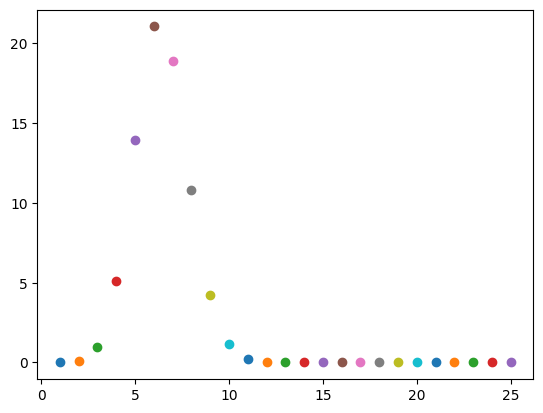

Time:  0.7312000990000342


In [ ]:
# This code snipet is to calculate the mean number of k-paths in a causet interval
# It uses Eqs. 12-14 from Aghili, Bombelli, and Pilgrim 2019
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial
start = timeit.default_timer()
d = 2  #number of dimensions
N = 25  #number of causal set elements
N_factorial=math.factorial(N)
fik_size_reductor=10**(0)
# Here kmax is the known maximum path length (using 25 just for illustration)
kmax = N+2

fik = np.zeros((N+1,N+3))  # initialize the array to zero
fik=fik.astype('float64')

# set all the values for k=1 to start the recursion
for i in range (0,N+1):
   fik[i][1] = math.gamma((i+1))


# recursion to fill the rest of the array
for k in range (2,N+2):
  for i in range (0,N-k+2):
    for j in range (0,i+1):
      fik[i][k] = fik[i][k] + math.gamma((i-j+1)) * fik[j][k-1]
    fik[i][k]=fik[i][k]*fik_size_reductor
print(fik)
print(fik.max())
print(fik.min())

# Now to get the mean number of k-paths (NumK) given a value of k for dimension d
NumK = 0
kval=np.zeros(N+2)
kval=kval.astype('float64')
for k in range(1,N+2):
  NumK = 0
  for i in range (0,N-k+2):
    NumK = NumK + math.comb(N-k+1,i) * ((-1)**(i)) * math.gamma(i+1) / math.gamma(i+k) * fik[i][k]/ math.gamma(i+k)/fik_size_reductor

  kval[k] = NumK * (N_factorial / math.factorial(N-k+1))

for k in range(1, N+1):
  plt.plot(k,kval[k], '-o')
print(kval)
print(N_factorial)
plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)

In [ ]:
import math
import numpy as np
from numpy import float128
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
from scipy.special import gamma, factorial, comb
print(gamma(3)/(2*gamma(1)))

1.0


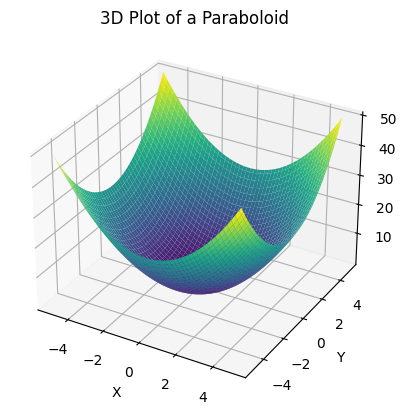

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a meshgrid for x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)

# Define a 3D function (e.g., a 3D paraboloid)
z = x**2 + y**2

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title for the plot
plt.title('3D Plot of a Paraboloid')

# Show the plot
plt.show()

In [ ]:
#SNIPPETS KPD EP_EXCLUDED
  path_counts=count_paths(L)
  print(path_counts)
  for i in range(n[f]):
    memory[f][i]=path_counts[i]
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  for i in range(n[f]):
    for j in range(n[f]):
      if(_LP_int[i][j] > proper_time):
        proper_time=_LP_int[i][j]
  print(proper_time)

[0.         0.12133072 0.12915851 0.12491846 0.11872146 0.10697978
 0.08969341 0.07632094 0.06621005 0.05153294 0.04142205 0.02902805
 0.01924331 0.01304631 0.00750163 0.00391389 0.00097847 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

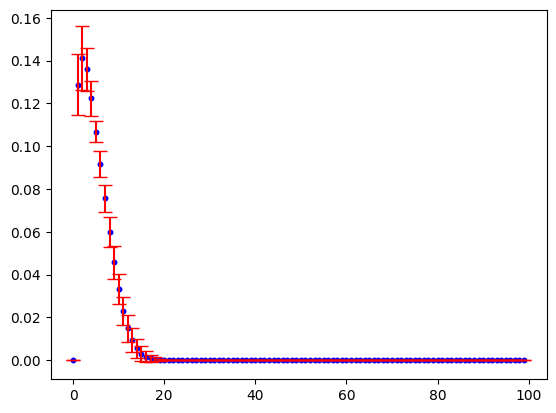

Time:  4.036150418999995


In [ ]:
#K-Path Distribution
#Endpoint: INCLUDED
#X-axis: ExpVal | Y-axis: avg K_Path freqency over NoS nmuber of sprinklings
import math
import numpy as np
import matplotlib.pyplot as plt
from array import array
from numpy.random import default_rng
import timeit
import csv
import pandas as pd
from array import array
start = timeit.default_timer()

#Variables
ExpVal=100
NoS=30
a = 50 # upper bound
b = 0 # lower bound

memory=np.zeros(shape=(NoS, ExpVal))
counter=np.zeros(NoS)
average=np.zeros(ExpVal)
rng = np.random.default_rng()
n= rng.poisson(ExpVal, NoS)
def longest_path_matrix(R, dmax=None):
    N = n[f]
    if dmax is None:
        dmax = N
    LP = np.zeros((N, N))
    i = 1
    B = R
    while np.sum(B) > 0.:
        path_exist = np.sign(B)
        path_length = i * path_exist
        LP = np.maximum.reduce((LP, path_length))
        B = np.dot(B, R)
        i += 1
        if i == dmax:
            return LP
    return LP


for f in range(NoS):
  R = [[0 for x in range(n[f])] for y in range(n[f])]
  L = [[0 for x in range(n[f])] for y in range(n[f])]
  # Random coordinates [b,a) uniform distributed
  if (n[f] > 1):
    coordy = (b-a)* np.random.random_sample((n[f],))+a # generate random y
    coordx = (b-a)* np.random.random_sample((n[f],))+a # generate random x
  else:
    coordy[0]=a
    coordx[0]=a
    coordy[1]=b
    coordx[1]=b
  index = np.argsort(coordx) # declare index array
#    print(index)

    # Calculate Relation Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      R[i][j]=0
      if (coordx[index[i]] > coordx[index[j]] and coordy[index[i]] > coordy[index[j]]):
        R[i][j]=1

  # Calculate Link Matrix
  for i in range(n[f]):
    for j in range (n[f]):
      L[i][j]=0
      if(R[i][j]==0):
        L[i][j]==0
      elif(i>j):
        L[i][j]=1
        for point in range (min(i,j)+1, max(i,j)):
          if(R[i][point]==1 and R[point][j]==1):
            L[i][j]=0

    #Calculate avg and proper time longest path length
  _LP=longest_path_matrix(R, dmax=None)
  _LP_int=_LP.astype(int)
  proper_time=0
  for i in range(n[f]):
    for j in range(n[f]):
      if(_LP_int[i][j] != 0):
        x=_LP_int[i][j]
        counter[f] +=1
        memory[f][x] +=1

sum_count=np.sum(counter)
average=np.sum(memory, axis=0)/sum_count
for f in range(NoS):
  memory[f]=memory[f]/counter[f]

print(memory[0])
print(average)
print(sum(memory[0]))

stnd_dev=np.std(memory, axis=0)
variance=np.var(memory, axis=0)

for i in range(ExpVal):
  #if(sd_memory[3][i] !=0):
  plt.scatter(i, average[i], linewidths=2, c='b', s=5)
  plt.errorbar(i, average[i], yerr=stnd_dev[i], fmt=' ', ecolor='r', capsize=5)
  list1 = ["Information:", "K-Path Length"]
  for q in range(np.max(n)):
    list1.append(q)
  list2=["ExpVal= %d" %(ExpVal),"K-path freq distribution"]
  list2.extend(average)
  list3=["NoS= %d" %(NoS), "Standard_Dev"]
  list3.extend(stnd_dev)
  list4=["Endpoints included", "Variance"]
  list4.extend(variance)
  rows = list(zip(list1, list2, list3, list4))

  wtr = csv.writer(open ('BOX_KPD_EP_included_%d_%d.csv'%(ExpVal, NoS), 'w'), delimiter=',', lineterminator='\n')

  for row in rows :
      wtr.writerow (row)

plt.show()

stop = timeit.default_timer()
print('Time: ', stop - start)